# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [60]:
# ... ENTER YOUR CODE HERE ...

In [61]:
import numpy as np
from math import sqrt

%matplotlib notebook

import matplotlib.pyplot as plt 
plt.xkcd() 

<IPython.core.display.Javascript object>


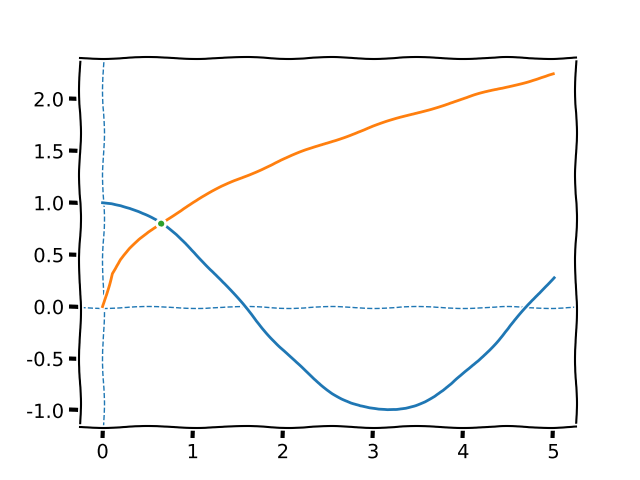

In [62]:
def f(x):
    return np.cos(x)
def g(x):
    return np.sqrt(x) 
xx = np.linspace(0, 5)  # create evenly spaced number of points in a specified interval
fig, ax = plt.subplots()   # make a subplot(участок на рисунке)
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1) # draw vertical and horizontal lines(0 = position, ls = linestyle =>
ax.plot(xx, f(xx))
ax.plot(xx, g(xx))
plt.plot([0.65], [f(0.65)], 'o', ms=4, mec='none')

<IPython.core.display.Javascript object>


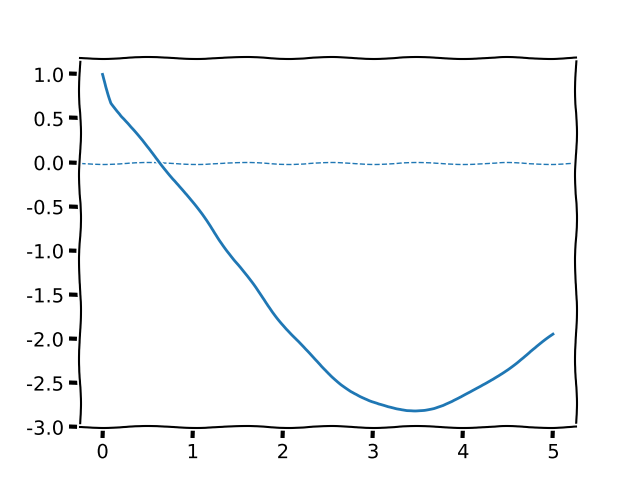

In [63]:
def h(x):
    return f(x) - g(x)

def hprime(x):   # производная от f
    return - np.sin(x) - 1/(2 * np.sqrt(x))
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(xx, h(xx))

<IPython.core.display.Javascript object>


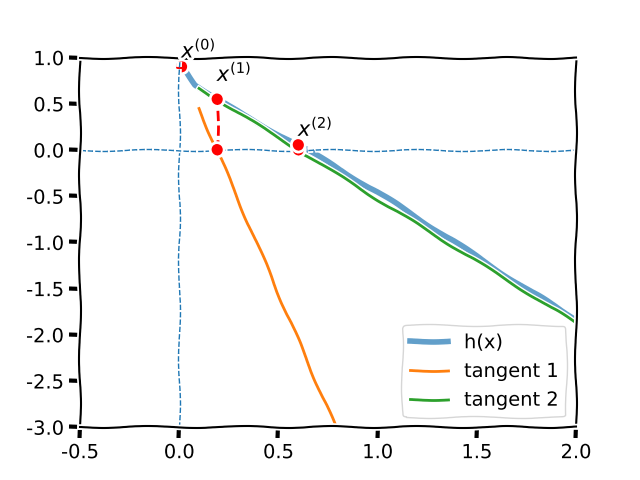

Root is approximatly= 0.5985567378129131


In [65]:
x = np.linspace(0.001, 4)

x0 = 0.01   # initial guess

plt.plot(x, h(x), lw=4, label='h(x)', alpha=0.7) # alpha = blending parameter
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
# plot the tangent line
xx = np.asarray([0.1, 2]) #Convert the input to an array, convert an array-like to an array
plt.plot(xx, hprime(x0)*(xx - x0) + h(x0), '-', label='tangent 1')


# initial point
plt.plot([x0], [h(x0)], 'ro', ms=8, mec='none') # ro and mec =none => red circle with no border color
plt.annotate(r'$x^{(0)}$',    # Annotate the point xy with text text.
             xy=(x0, h(x0)),  # xy => the point to annotate
             xytext=(x0, h(x0)+0.1),  #  The position (x,y) to place the text at. If None, defaults to xy.
             fontsize=15,
             ) #arrowprops=dict(facecolor='C1', shrink=0.5))


# tangent crossing the curve & the zero
xc = -h(x0)/hprime(x0) + x0     # xc is the better guess
plt.plot([xc, xc], [0, h(xc)], 'ro--', ms=8, mec='none', zorder=101) # position 2 vertical points on the new guess xc
#  Set the zorder for the artist. Artists with lower zorder values are drawn first.
plt.annotate(r'$x^{(1)}$',
             xy=(xc, h(xc)),
             xytext=(xc, h(xc)+0.2),
             fontsize=15,
             )

plt.legend(loc='lower right') # place the legend
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.xlim([-0.5, 2]) # Get or set the x limits of the current axes.
plt.ylim([-3, 1])
#plt.savefig('newton_1.jpg')

# 2nd tangent
xx1 = np.array([0.1, 2])
plt.plot(xx1, hprime(xc)*(xx1 - xc) + h(xc), '-', label='tangent 2')

# 2nd tangent crossing the curve & the zero
xcc = -h(xc)/hprime(xc) + xc
plt.plot([xcc, xcc], [0, h(xcc)], 'ro--', ms=8, mec='none', zorder=101)

plt.annotate(r'$x^{(2)}$',
             xy=(xcc, h(xcc)),
             xytext=(xcc, h(xcc)+0.1),
             fontsize=15,
             )

plt.legend(loc='lower right')
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
print('Root is approximatly=',xcc)


In [66]:
x0 = 0.001
a = x0
xc = 2
i = 0
while abs(xc - x0) > 0.000001:
    if abs(xc - x0) < 5:
        i +=1
        x0 = a
        xc = -h(x0)/hprime(x0) + x0     # xc is the better guess
        a = xc
print(xc,x0, i)

0.6417143708728826 0.6417143708730588 6


Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

<IPython.core.display.Javascript object>


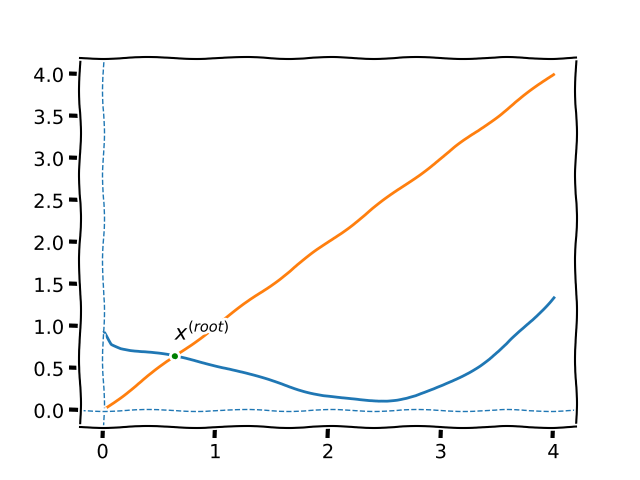

Root =  0.6416445760066882 ; Number of iterations =  9 ; Initial guess =  10


In [67]:
# ... ENTER YOUR CODE HERE ...
def fi(x):
    return x + np.cos(x) - np.sqrt(x)
def find(x,n):
    y = fi(x)
    if abs(y-x)> 0.001 and abs(y-x) < 20:
        n += 1
        return find(y,n)
    return y, n
root = 0
x0 = 10
n = 0
find(x0,n)
root = find(x0,n)[0]
num = find(x0,n)[1]
plt.plot(x,fi(x))
plt.plot(x, x)
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot([root], [fi(root)], 'go', ms=4, mec='none')
plt.annotate(r'$x^{(root)}$',
             xy=(root, fi(root)),
             xytext=(root, fi(root)+0.2),
             fontsize=15,
             )
             
print('Root = ',root, '; Number of iterations = ',num, '; Initial guess = ', x0 )

#NEED TO FIND THE NUMBER OF ITERATIONS

# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [68]:
def inverse_quadratic_interpolation(f, x0, x1, x2, max_iter, tolerance):
    steps_taken = 0
    while steps_taken < max_iter and abs(x1-x0) > tolerance: # last guess and new guess are v close
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
        L0 = (x0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2))
        L1 = (x1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
        L2 = (x2 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
        new = L0 + L1 + L2
        x0, x1, x2 = new, x0, x1
        steps_taken += 1
    return x0, steps_taken

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

In [69]:
f = lambda x: x - np.reciprocal(np.tan(x))
#f = lambda x: np.cos(x) - np.sqrt(x)
root, steps = inverse_quadratic_interpolation(f, 0.6, 0.8, 1,30,1e-3)
print("root is:", root)
print("steps taken:", steps)


root is: 0.8603335753774751
steps taken: 2


# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [70]:
def h(z):
    return z ** 3 - 1 
def hprime(z):
    return 3*z**2


In [84]:
# here i found the roots using the fast effective method for verifying
# then use the newton method
A = np.array([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0]])

from numpy.linalg import eig
e, v = eig(A)
e

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

<IPython.core.display.Javascript object>


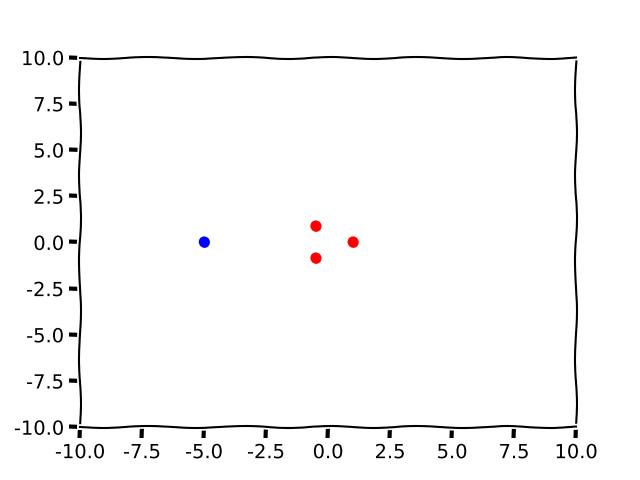

Enter real value-5
Enter imag. value0
Initial guess:  (-5+0j) ; Root :  (1.0000009119468984+0j) ; Number of iterations: 18


(-10, 10)

In [98]:
import numpy as np
ig, ax = plt.subplots()

def h(z):
    return z ** 3 - 1


def hprime(z):
    return 3 * z ** 2

z0 = int(input('Enter real value')) + 1j* int(input('Enter imag. value'))
x, y = np.linspace(-4, 4), np.linspace(-4, 4)
z = x + 1j * y
a = b = z0 
zc = z0 + 1
i = 0

while abs(zc - z0) > 0.001:
    if abs(zc - z0) < 1000:
        i += 1
        z0 = a
        zc = -h(z0)/hprime(z0) + z0
        a = zc
print('Initial guess: ',b,'; Root : ',zc,'; Number of iterations:', i)

if abs(zc - e[0]) < 0.1:
    plt.plot([b.real], [b.imag], 'ro', ms=8, mec='none')
elif abs(zc - e[1]) < 0.1:
    plt.plot([b.real], [b.imag], 'go', ms=8, mec='none')
elif abs(zc - e[2]) < 0.1:
    plt.plot([b.real],[b.imag] , 'bo', ms=8, mec='none')

for i in range(len(e)):
    plt.plot([e[i].real], [e[i].imag],'ro', ms=8, mec='none')

plt.xlim([-10, 10])
plt.ylim([-10, 10])

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).